In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

SPI = pd.read_csv('SPI_Group-F.csv', skiprows=np.linspace(0, 6))
print(SPI.head())
print(SPI.columns)

   Time (s)  CS  SCLK  MOSI  MISO
0 -0.000019   1     1     0     0
1 -0.000019   1     1     0     0
2 -0.000019   1     1     0     0
3 -0.000019   1     1     0     0
4 -0.000019   1     1     0     0
Index(['Time (s)', 'CS', 'SCLK', 'MOSI', 'MISO'], dtype='object')


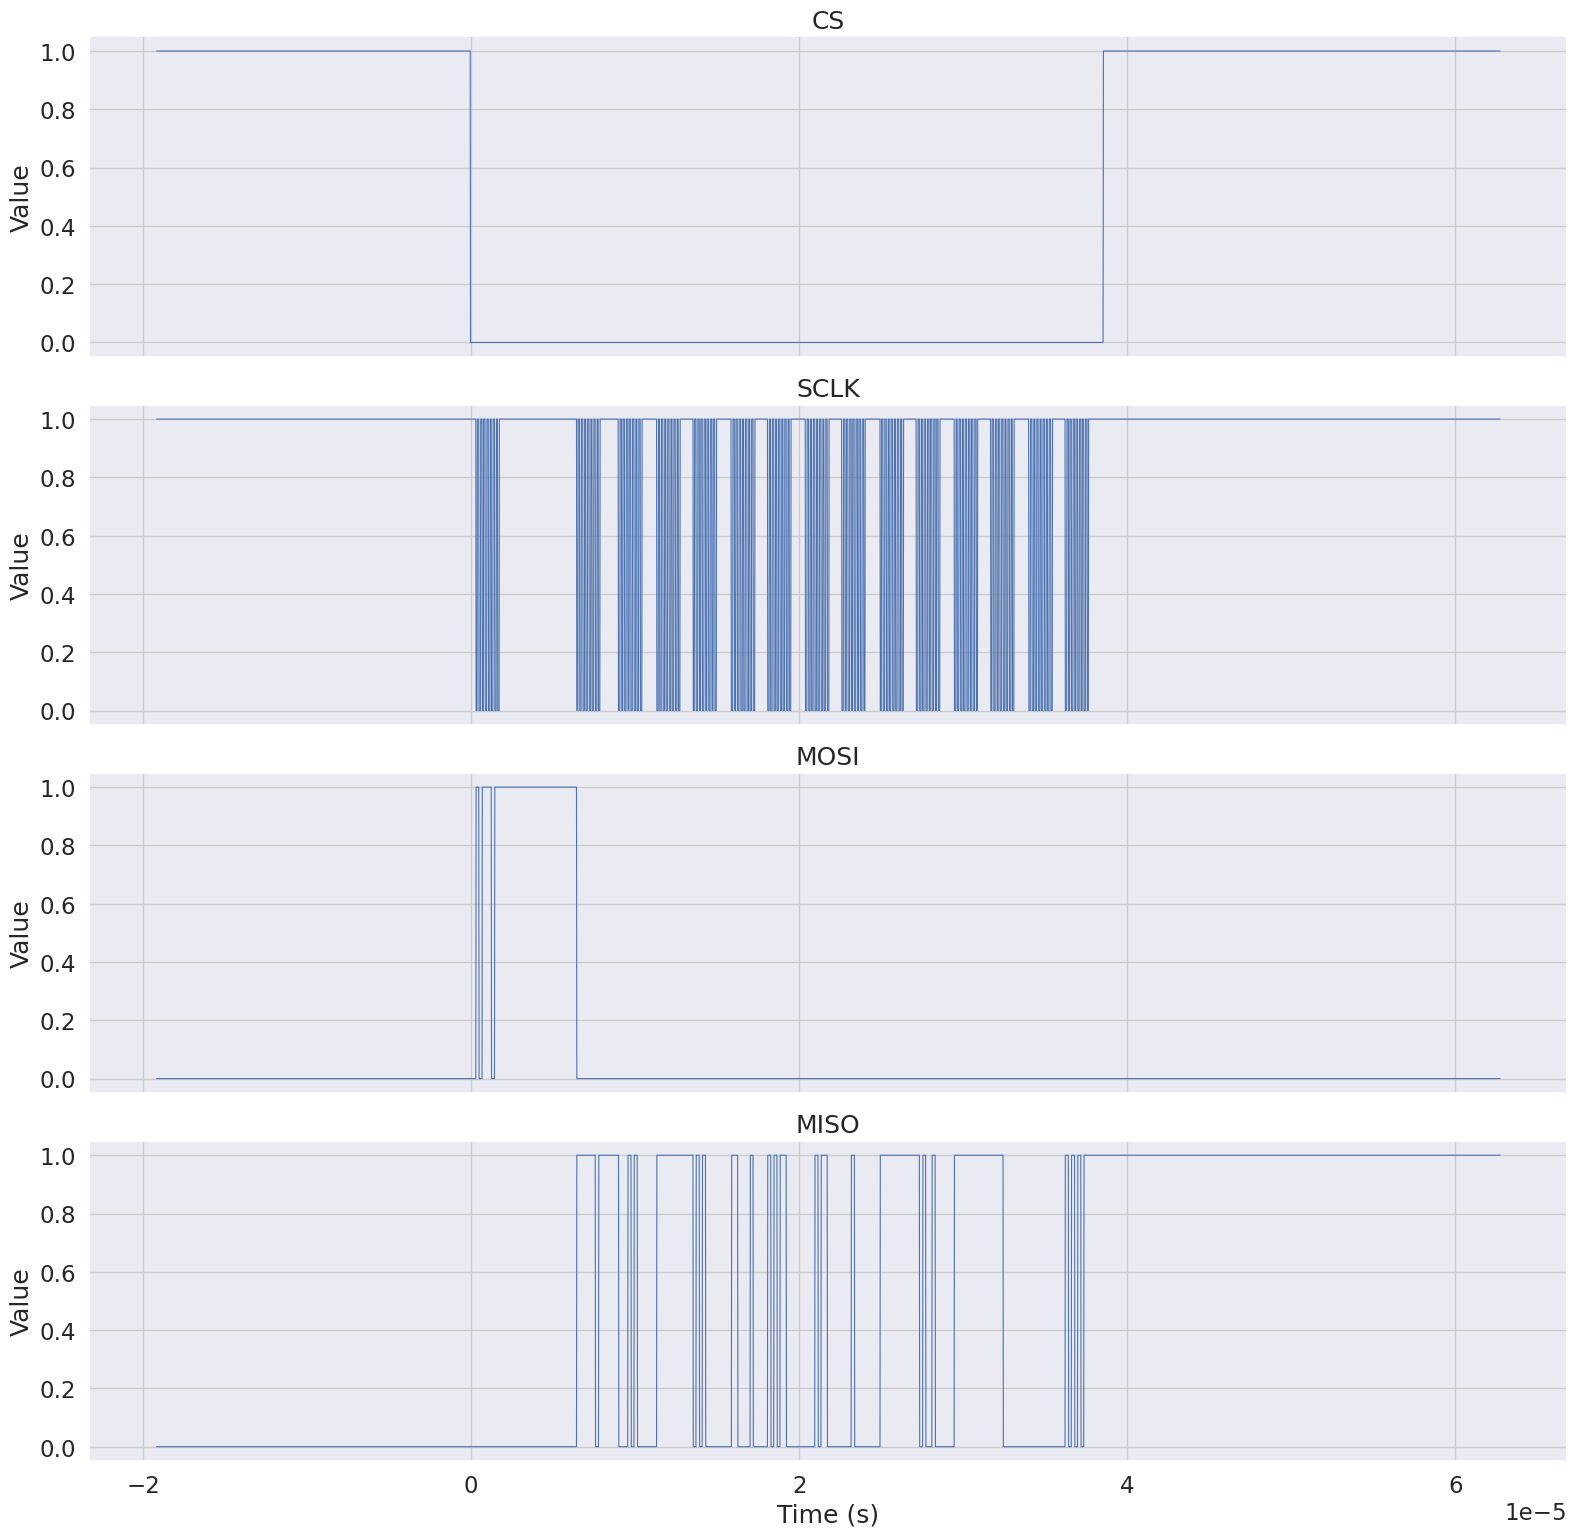

In [2]:
sns.set()
sns.set_style('darkgrid', {"grid.color": ".8"})
sns.set_palette('husl')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig, axes = plt.subplots(4, 1, figsize=(16, 16), sharex=True)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

axes[0].plot(SPI['Time (s)'], SPI['CS'], c='b', linewidth=.8)
axes[0].set_ylabel('Value')
axes[0].set_title('CS')

axes[1].plot(SPI['Time (s)'], SPI['SCLK'], c='b', linewidth=.8)
axes[1].set_ylabel('Value')
axes[1].set_title('SCLK')

axes[2].plot(SPI['Time (s)'], SPI['MOSI'], c='b', linewidth=.8)
axes[2].set_ylabel('Value')
axes[2].set_title('MOSI')

axes[3].plot(SPI['Time (s)'], SPI['MISO'], c='b', linewidth=.8)
axes[3].set_ylabel('Value')
axes[3].set_title('MISO')
axes[3].set_xlabel('Time (s)')

plt.show()

         Time (s)  CS  SCLK  MOSI  MISO
973  2.800000e-07   0     1     0     0
974  3.000000e-07   0     0     1     0
975  3.200000e-07   0     0     1     0
976  3.400000e-07   0     0     1     0
977  3.600000e-07   0     0     1     0
978  3.800000e-07   0     1     1     0
979  4.000000e-07   0     1     1     0
980  4.200000e-07   0     1     1     0
981  4.400000e-07   0     1     1     0
982  4.600000e-07   0     1     1     0
983  4.800000e-07   0     0     0     0


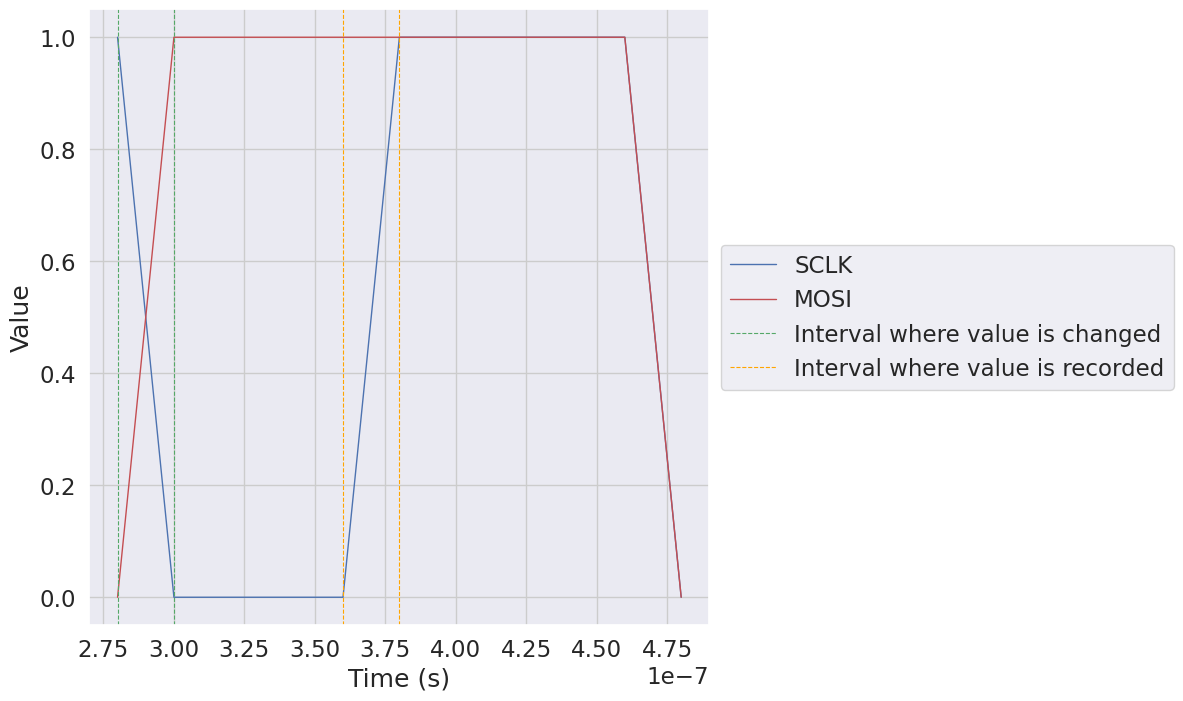

In [3]:
one_bit = SPI[(SPI['Time (s)'] >= 2.80e-7) & (SPI['Time (s)'] <= 4.80e-7)]
print(one_bit)
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(one_bit['Time (s)'], one_bit['SCLK'], c='b', linewidth=1, label='SCLK')
ax.plot(one_bit['Time (s)'], one_bit['MOSI'], c='r', linewidth=1, label='MOSI')
ax.axvline(x=2.80e-7, color='g', linestyle='dashed', linewidth=.8, label='Interval where value is changed')
ax.axvline(x=3.00e-7, color='g', linestyle='dashed', linewidth=.8)
ax.axvline(x=3.60e-7, color='orange', linestyle='dashed', linewidth=.8, label='Interval where value is recorded')
ax.axvline(x=3.80e-7, color='orange', linestyle='dashed', linewidth=.8)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Value')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [4]:
SPI_melt = pd.melt(SPI, id_vars=SPI.columns[0], value_vars=SPI.columns[1:])
print(SPI_melt)

       Time (s) variable  value
0     -0.000019       CS      1
1     -0.000019       CS      1
2     -0.000019       CS      1
3     -0.000019       CS      1
4     -0.000019       CS      1
...         ...      ...    ...
16379  0.000063     MISO      1
16380  0.000063     MISO      1
16381  0.000063     MISO      1
16382  0.000063     MISO      1
16383  0.000063     MISO      1

[16384 rows x 3 columns]


/tmp/ipykernel_9070/2164791064.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(data=SPI_melt, x=SPI_melt.columns[0], y=SPI_melt.columns[2], row=SPI_melt.columns[1], kind='line', palette='husl', linewidth=.5)


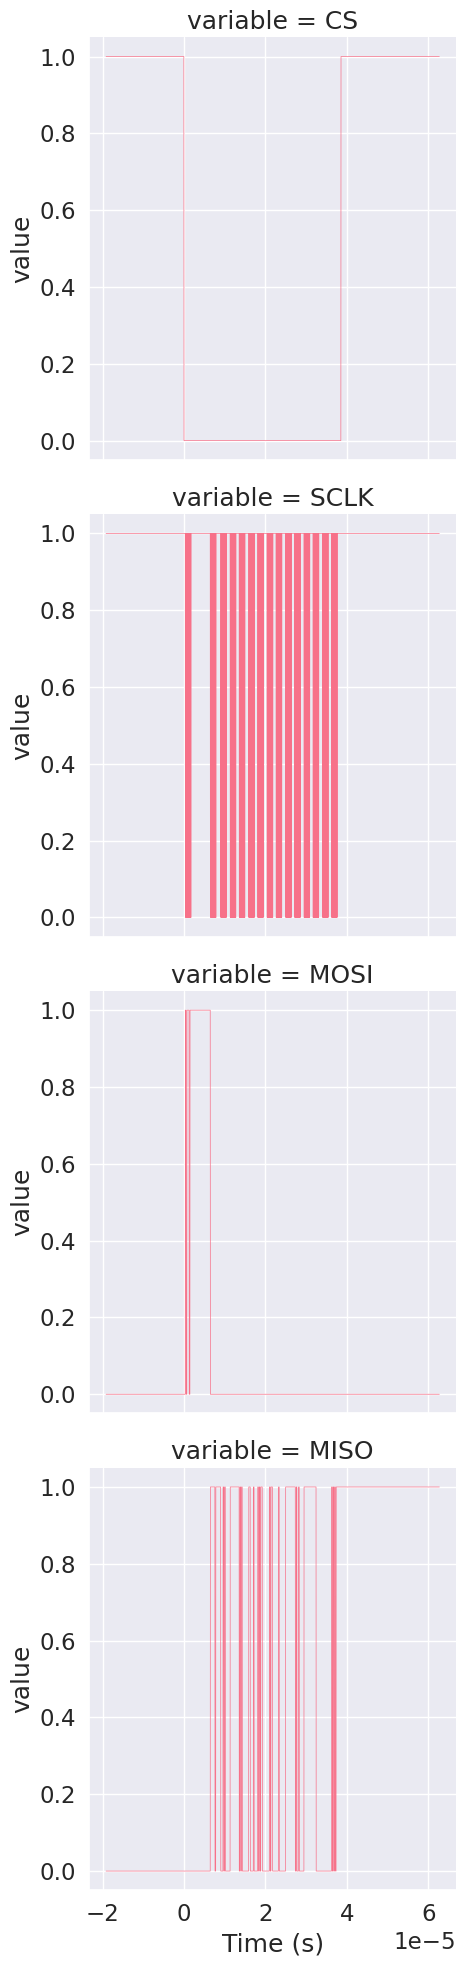

In [5]:
sns.set_style('darkgrid')
sns.relplot(data=SPI_melt, x=SPI_melt.columns[0], y=SPI_melt.columns[2], row=SPI_melt.columns[1], kind='line', palette='husl', linewidth=.5)
plt.show()